from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Beer Consumption in Sao Paulo Universities.

> The data (sample) was collected in São Paulo — Brazil, within a university area, where there are parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, and ranges within period of one year.

In [72]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matrixprofile import *

In [73]:
sns.set_palette('cubehelix')

In [74]:
new_cols = ['date', 'avg_temp', 'min_temp', 'max_temp', 'precipitation_mm', 'weekend', 'total_consumption']
beer_df = pd.read_csv('consumo_cerveja.csv', skiprows=1, names=new_cols, index_col=['date'], parse_dates=['date'])

In [75]:
profile = beer_df.profile_report(title='Beer Profiling Report')
profile.to_file(output_file="init_beer_profile_report.html")

## Data exploration

In [76]:
beer_df.head()

,avg_temp,min_temp,max_temp,precipitation_mm,weekend,total_consumption
date,,,,,,
2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [77]:
beer_df.tail()

,avg_temp,min_temp,max_temp,precipitation_mm,weekend,total_consumption
date,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941 entries, 2015-01-01 to NaT
Data columns (total 6 columns):
avg_temp             365 non-null object
min_temp             365 non-null object
max_temp             365 non-null object
precipitation_mm     365 non-null object
weekend              365 non-null float64
total_consumption    365 non-null float64
dtypes: float64(2), object(4)
memory usage: 51.5+ KB


## Data transformation

In [79]:
beer_df = beer_df.dropna(how='all')
cols_to_float = ['avg_temp', 'min_temp', 'max_temp', 'precipitation_mm']
beer_df[cols_to_float] = beer_df[cols_to_float].applymap(lambda x: str(x).replace(',', '.')).astype(float)

In [80]:
beer_df['day_of_year'] = beer_df.index.dayofyear
beer_df['day'] = beer_df.index.day
beer_df['week_day'] = beer_df.index.weekday
beer_df['month'] = beer_df.index.month
beer_df['year'] = beer_df.index.year

beer_df['temp_variance'] = beer_df.max_temp - beer_df.min_temp

In [81]:
beer_df.describe()

,avg_temp,min_temp,max_temp,precipitation_mm,weekend,total_consumption,day_of_year,day,week_day,month,year,temp_variance
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.0,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,183.000000,15.720548,3.0,6.526027,2015.0,9.150137
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,105.510663,8.808321,2.0,3.452584,0.0,3.194566
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,1.000000,0.0,1.000000,2015.0,2.500000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,92.000000,8.000000,1.0,4.000000,2015.0,6.700000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,183.000000,16.000000,3.0,7.000000,2015.0,9.400000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,274.000000,23.000000,5.0,10.000000,2015.0,11.400000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,365.000000,31.000000,6.0,12.000000,2015.0,18.100000


## Dataframe `info`

In [82]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 12 columns):
avg_temp             365 non-null float64
min_temp             365 non-null float64
max_temp             365 non-null float64
precipitation_mm     365 non-null float64
weekend              365 non-null float64
total_consumption    365 non-null float64
day_of_year          365 non-null int64
day                  365 non-null int64
week_day             365 non-null int64
month                365 non-null int64
year                 365 non-null int64
temp_variance        365 non-null float64
dtypes: float64(7), int64(5)
memory usage: 37.1 KB


In [83]:
def weekend_day(val: float) -> int:
    if val == 5:
        return 'saturday'
    elif val == 6:
        return 'sunday'
    return 'workday'

In [84]:
beer_df['weekend_day'] = beer_df['week_day'].apply(weekend_day)

In [85]:
profile = beer_df.profile_report(title='Beer Profiling Report')
profile.to_file(output_file="cleaned_beer_profile_report.html")

## Data visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002341BC7AEF0>],
      dtype=object)

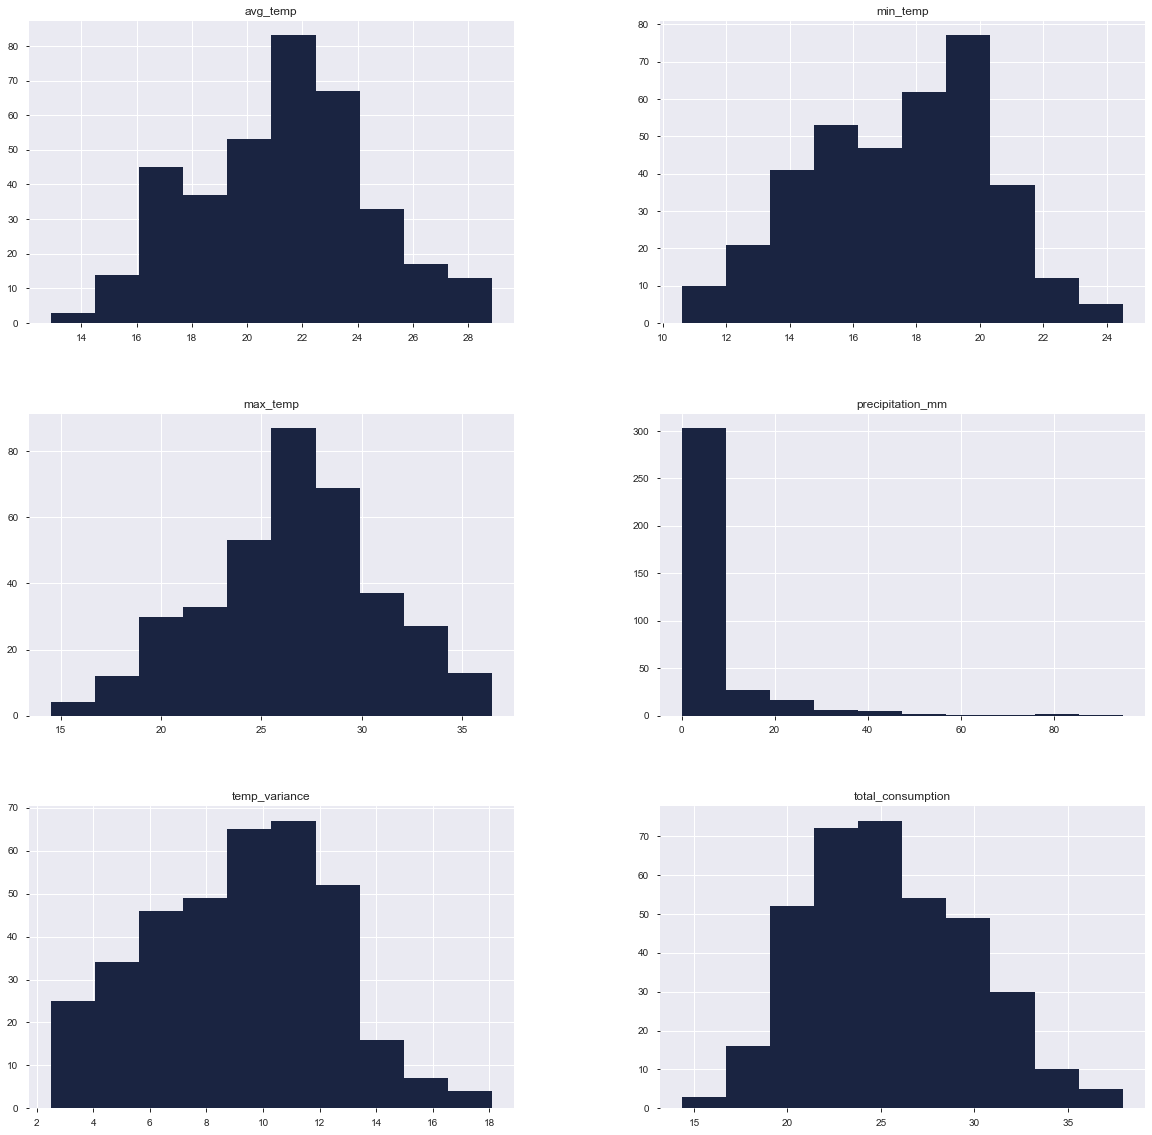

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(20,20))
beer_df[['avg_temp']].hist(ax=ax1[0])
beer_df[['min_temp']].hist(ax=ax1[1])
beer_df[['max_temp']].hist(ax=ax2[0])
beer_df[['precipitation_mm']].hist(ax=ax2[1])
beer_df[['temp_variance']].hist(ax=ax3[0])
beer_df[['total_consumption']].hist(ax=ax3[1])

## Total vs mean %: drinking on weekends

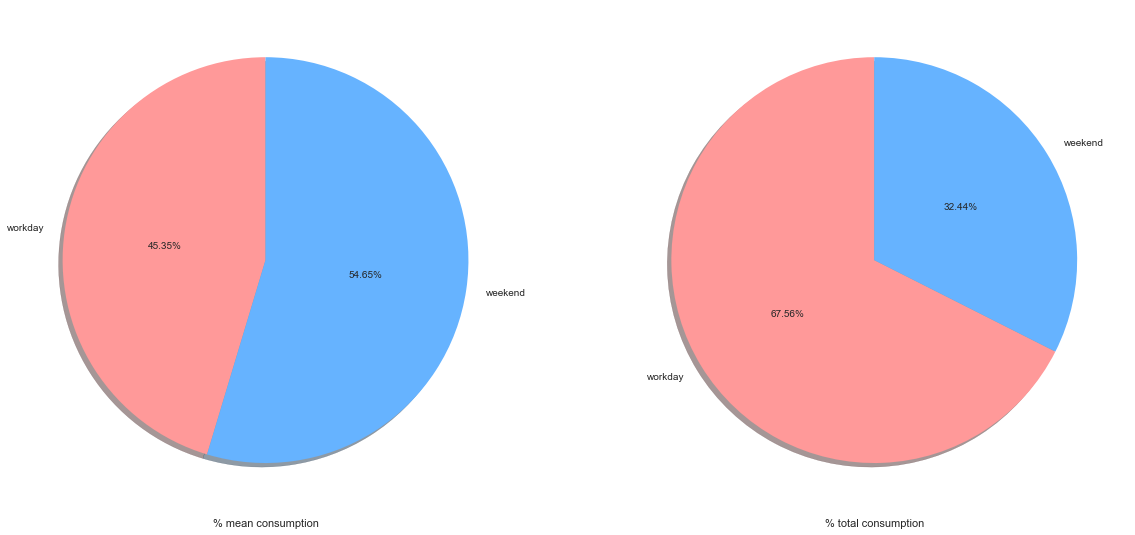

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart
labels = ['workday', 'weekend']
means = beer_df.groupby('weekend')['total_consumption'].mean()
sums = beer_df.groupby('weekend')['total_consumption'].sum()
#colors
colors = ['#ff9999','#66b3ff']
 
ax1.pie(means, colors = colors, labels=labels, autopct='%2.2f%%', startangle=90, pctdistance=0.5, shadow=True)
ax2.pie(sums, colors = colors, labels=labels, autopct='%2.2f%%', startangle=90, pctdistance=0.5, shadow=True)

# #draw circle
# centre_circle = plt.Circle((0,0),0.80,fc='white')
# fig = plt.gcf()

# fig.gca().add_artist(centre_circle)


ax1.set_xlabel('% mean consumption')
ax2.set_xlabel('% total consumption')

# plt.tight_layout()
plt.show()

## Average consumption and Total consumption on weekdays vs weekends

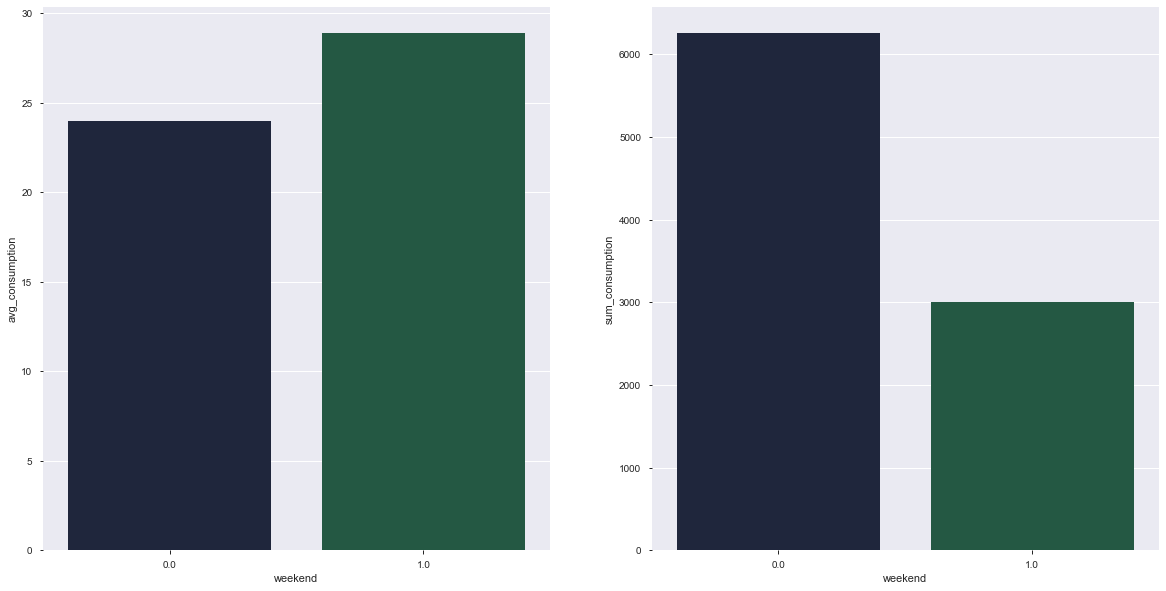

In [88]:
avg_consumption_df = beer_df.groupby('weekend')['total_consumption'].mean().reset_index(name='avg_consumption')
total_consumption_df = beer_df.groupby('weekend')['total_consumption'].sum().reset_index(name='sum_consumption')

fig, axes = plt.subplots(1, 2, figsize=(20,10))

sns.barplot('weekend', 'avg_consumption', data=avg_consumption_df, ax=axes[0])
sns.barplot('weekend', 'sum_consumption', data=total_consumption_df, ax=axes[1])

In [89]:
total_cons_df = beer_df.sort_values('total_consumption', ascending=False).head(92)


## Total consumption per month and per month (weekday vs weekend)

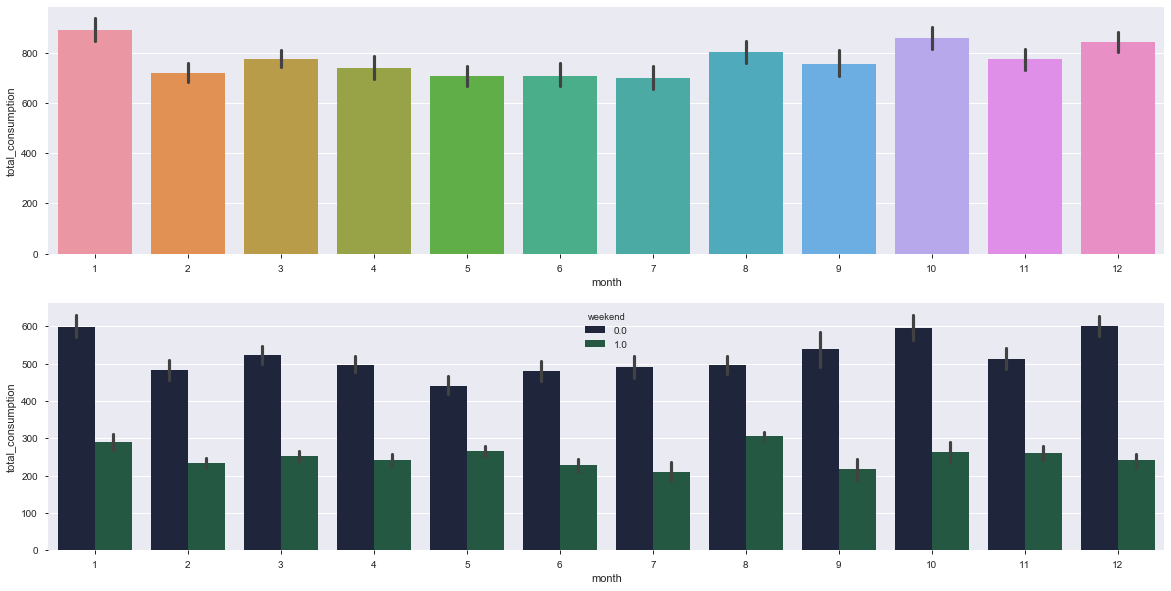

In [90]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))
sns.barplot(x="month", y="total_consumption", data=beer_df, estimator=sum, ax=ax1)
sns.barplot(x='month', y='total_consumption', hue='weekend', data=beer_df, estimator=sum, ax=ax2)


## Total vs Avg consumption per weekday

Text(0, 0.5, 'Avg consumption')

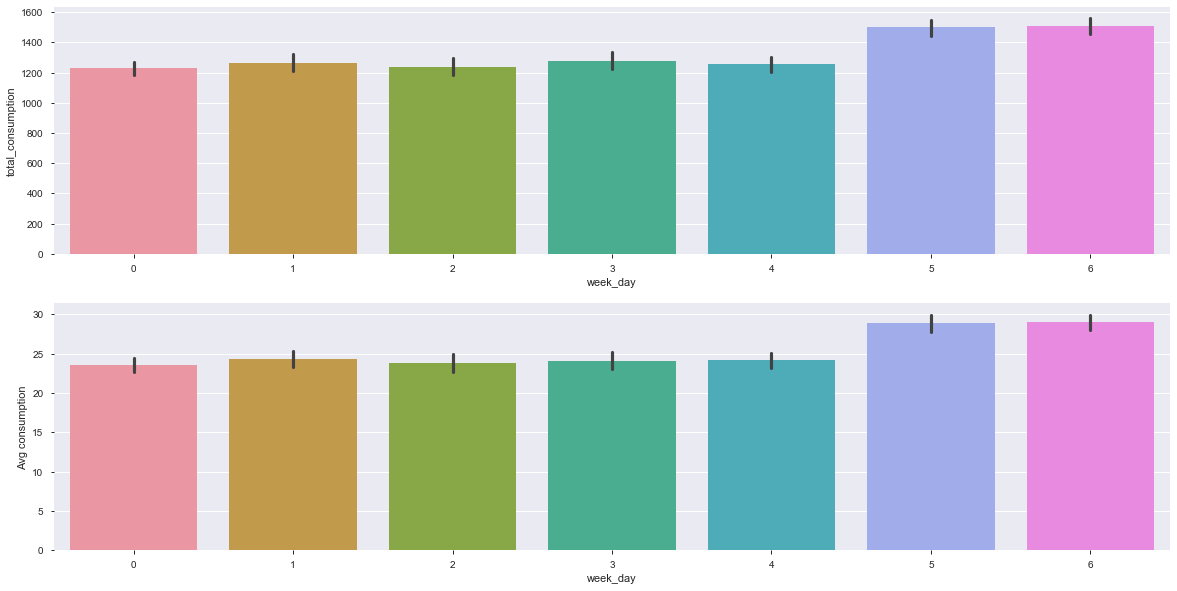

In [91]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))
sns.barplot(x="week_day", y="total_consumption", data=beer_df, estimator=sum, ax=ax1)
sns.barplot(x="week_day", y="total_consumption", data=beer_df, estimator=np.mean, ax=ax2)

ax2.set_ylabel('Avg consumption')

## Liter per `mm` of rain XD

In [92]:
liters_per_mm = sum(beer_df.total_consumption)/sum(beer_df.precipitation_mm)
print("{0:.2f}L for every mm of rain during the year.".format(liters_per_mm))


4.89L for every mm of rain during the year.


## Next day's difference in consumption
> The first bar chart represent a regular bar chart of total consumption each day of the year (100 days). The second chart represent the differnce in consumption from one day to the next.

In [93]:
data = beer_df[['total_consumption']].head(100)
weekends = beer_df[['weekend']].head(100)
data = data.diff().join(weekends)

In [94]:
sample = beer_df.head(100)

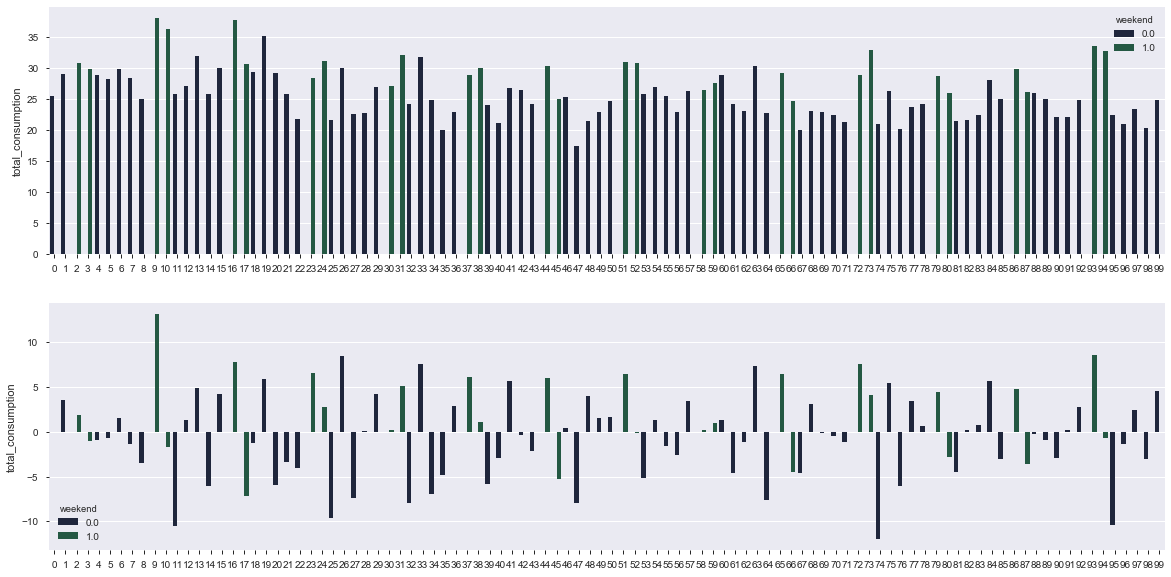

In [95]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))
sns.barplot(x=list(range(len(sample))), y='total_consumption', hue='weekend', data=sample, ax=ax1)
sns.barplot(x=list(range(len(data))), y='total_consumption', hue='weekend', data=data, ax=ax2)

## 

In [96]:
data = beer_df[['avg_temp','min_temp','max_temp', 'temp_variance','precipitation_mm', 'total_consumption', 'weekend']]

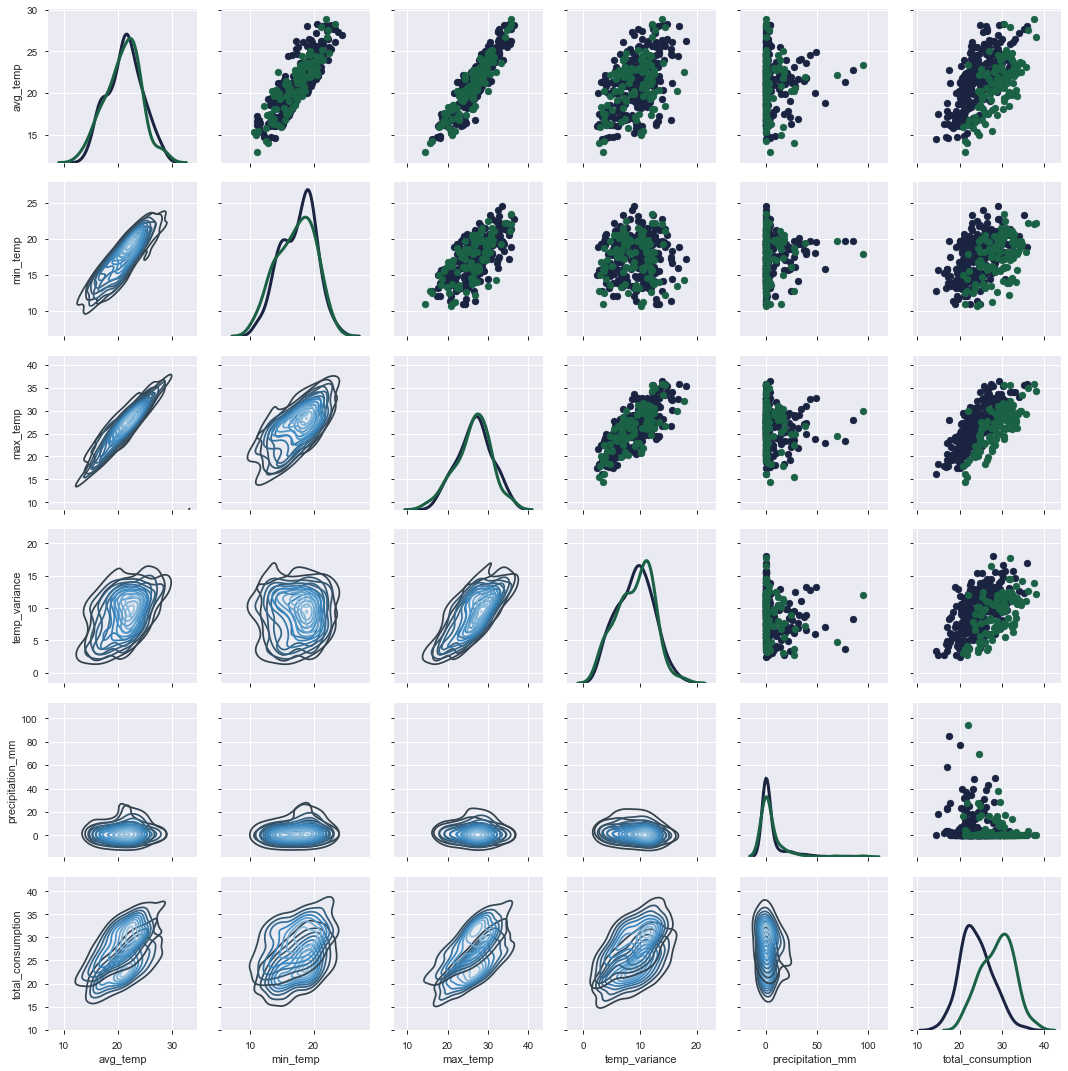

In [97]:
g = sns.PairGrid(data, vars=data.columns[:-1], hue='weekend')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

## Total consumption correlation with temps and weekend

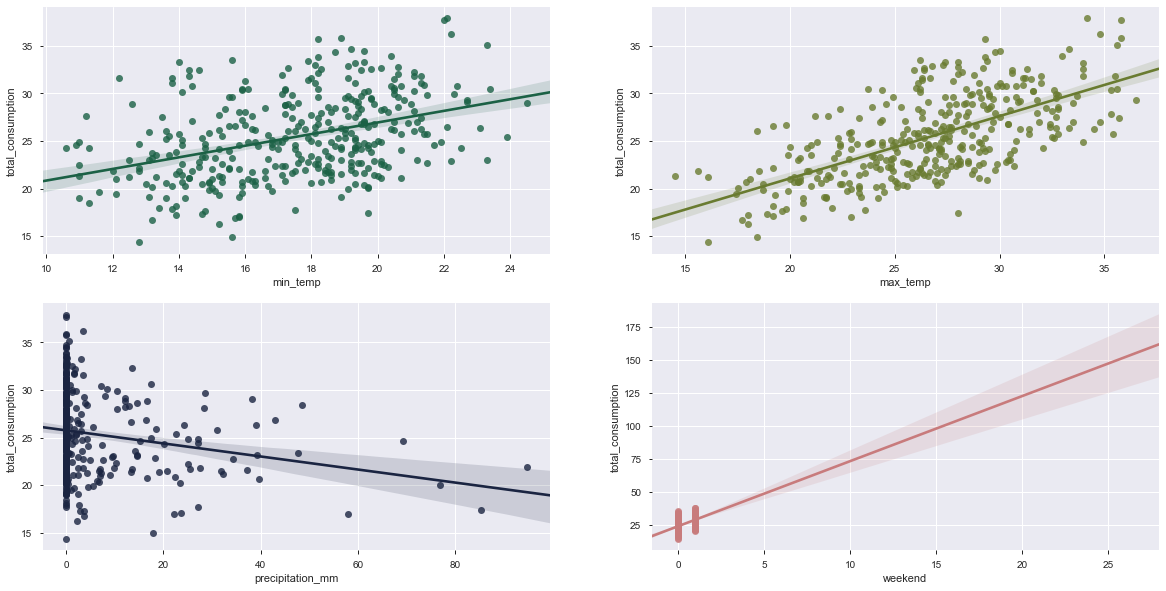

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.regplot('precipitation_mm', 'total_consumption', beer_df, ax=axes[1,0])
sns.regplot('min_temp', 'total_consumption', beer_df, ax=axes[0,0])
sns.regplot('max_temp', 'total_consumption', beer_df, ax=axes[0,1])
sns.regplot('weekend', 'total_consumption', beer_df, ax=axes[1,1])


# Time Series

In [99]:
weekly_consumption = beer_df.resample('W').sum()
monthly_consumption = beer_df.resample('M').sum()
trimester_consumption = beer_df.resample('3M').sum()

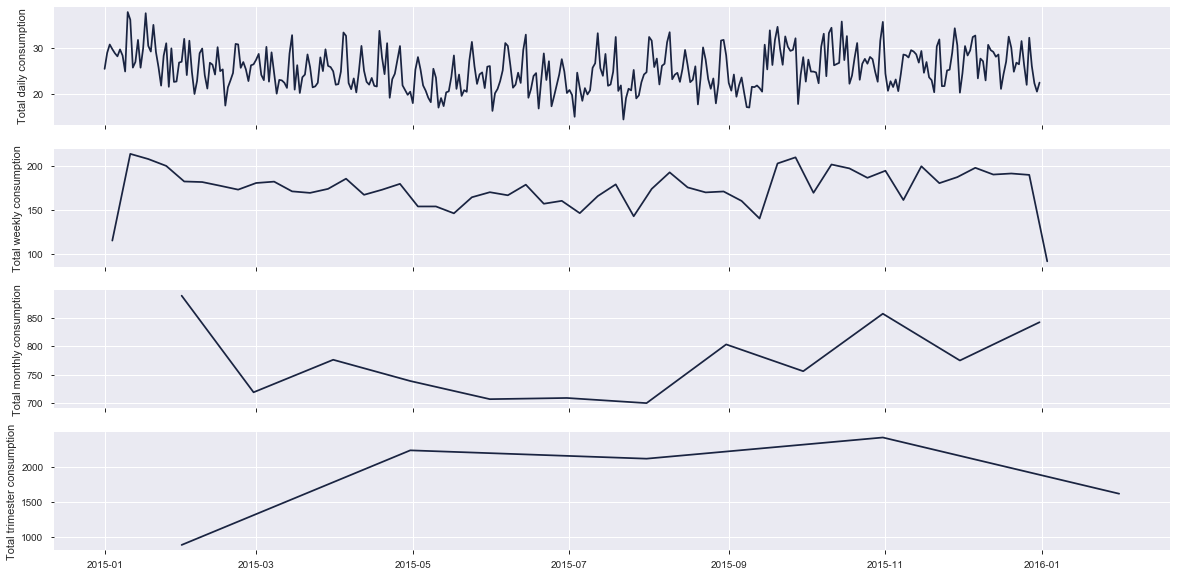

In [100]:
fig, (ax1,ax2,ax3,ax4) =plt.subplots(4, 1, figsize=(20,10), sharex=True)

ax1.set_ylabel('Total daily consumption')
ax1.plot(beer_df['total_consumption'])

ax2.set_ylabel('Total weekly consumption')
ax2.plot(weekly_consumption['total_consumption'])

ax3.set_ylabel('Total monthly consumption')
ax3.plot(monthly_consumption['total_consumption'])

ax4.set_ylabel('Total trimester consumption')
ax4.plot(trimester_consumption['total_consumption'])

Text(0, 0.5, 'Trimester')

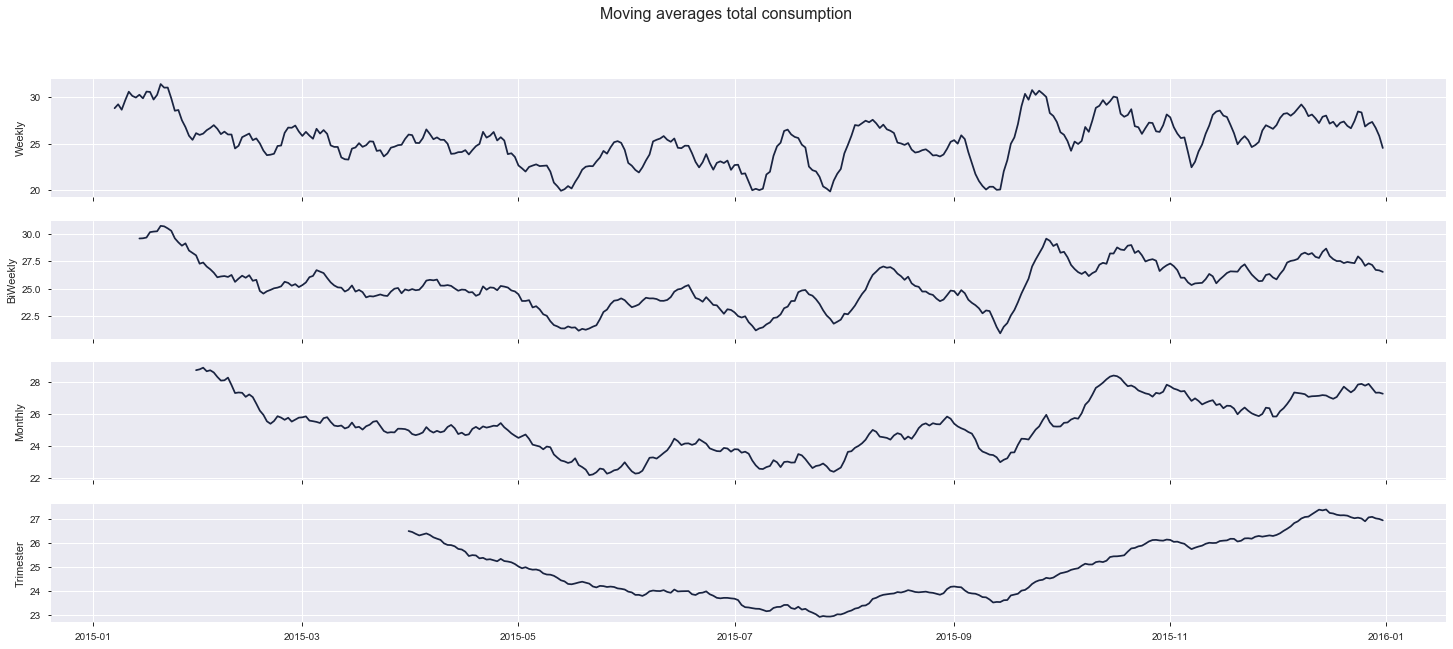

In [101]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(25,10), sharex=True)

fig.suptitle('Moving averages total consumption', fontsize=16)

ax0.plot(beer_df.total_consumption.rolling(window=7).mean())
ax1.plot(beer_df.total_consumption.rolling(window=14).mean())
ax2.plot(beer_df.total_consumption.rolling(window=30).mean())
ax3.plot(beer_df.total_consumption.rolling(window=90).mean())

ylabels = ['Weekly', 'BiWeekly', 'Monthly', 'Trimester']
ax0.set_ylabel(ylabels[0])
ax1.set_ylabel(ylabels[1])
ax2.set_ylabel(ylabels[2])
ax3.set_ylabel(ylabels[3])

# Matrix Profile

In [102]:
from matrixprofile import matrixProfile
m = 32
mp = matrixProfile.stomp(beer_df['total_consumption'].values,m)
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

Text(0.5, 0, 'Sample')

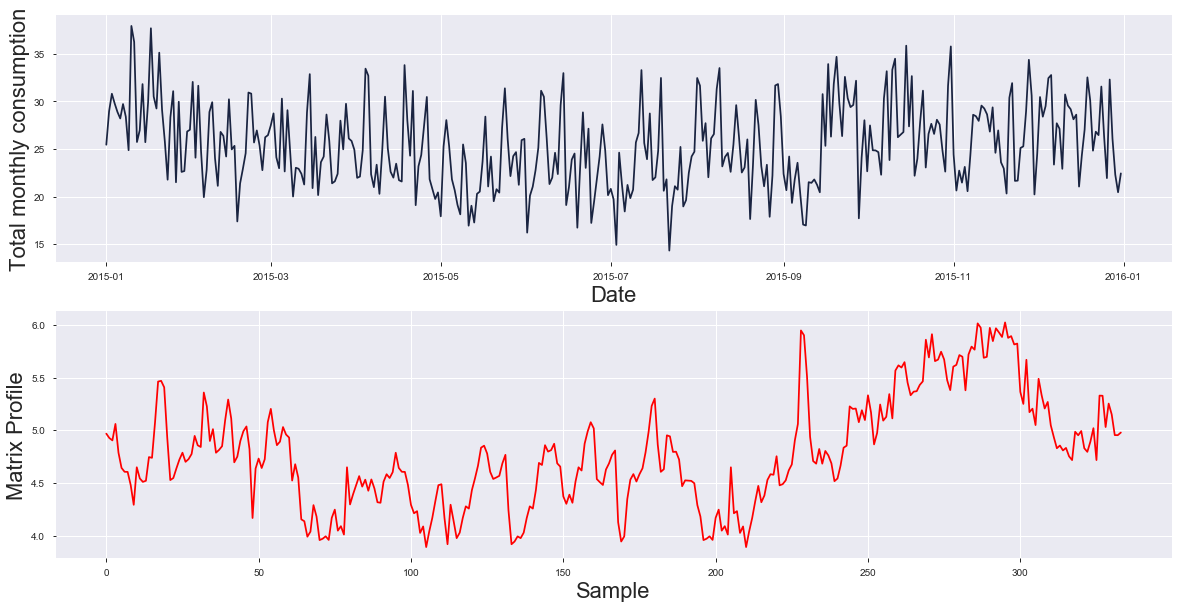

In [103]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

ax1.set_ylabel('Total monthly consumption', size=22)
ax1.set_xlabel('Date', size=22)
ax1.plot(beer_df.total_consumption)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

# Linear Regression

In [104]:
one_hot = pd.get_dummies(beer_df.weekend, prefix='weekend')
two_hot = pd.get_dummies(beer_df.weekend_day, prefix='weekend_day')
two_hot = two_hot.join(one_hot)
beer_df = beer_df.join(two_hot, on=beer_df.index)

In [105]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
                                     MinMaxScaler, 
                                     StandardScaler, 
                                     OneHotEncoder, 
                                     LabelEncoder
                                  )

from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn import metrics

In [106]:
lin_reg_df_min_max = beer_df.copy(deep=True)
lin_reg_df_std = beer_df.copy(deep=True)

In [107]:
cols_to_normalize = ['avg_temp', 'min_temp', 'max_temp', 'precipitation_mm', 'temp_variance']

In [108]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

min_max_scaler.fit(lin_reg_df_min_max[cols_to_normalize])
lin_reg_df_min_max[cols_to_normalize] = min_max_scaler.transform(lin_reg_df_min_max[cols_to_normalize])

standard_scaler.fit(lin_reg_df_std[cols_to_normalize])
lin_reg_df_std[cols_to_normalize] = standard_scaler.transform(lin_reg_df_std[cols_to_normalize])

In [109]:
lin_reg_df_std.head()

,avg_temp,min_temp,max_temp,precipitation_mm,weekend,total_consumption,day_of_year,day,week_day,month,year,temp_variance,weekend_day,weekend_day_saturday,weekend_day_sunday,weekend_day_workday,weekend_0.0,weekend_1.0
date,,,,,,,,,,,,,,,,,,
2015-01-01,1.912508,2.281333,1.365781,-0.419062,0.0,25.461,1,1,3,1,2015,-0.172447,workday,0,0,1,1,0
2015-01-02,1.824340,2.493924,1.597722,-0.419062,0.0,28.972,2,2,4,1,2015,-0.047062,workday,0,0,1,1,0
2015-01-03,1.131590,1.749853,0.762735,-0.419062,1.0,30.814,3,3,5,1,2015,-0.517254,saturday,1,0,0,0,1
2015-01-04,0.867085,1.430966,0.461212,-0.322294,1.0,29.799,4,4,6,1,2015,-0.642638,sunday,0,1,0,0,1
2015-01-05,0.816703,1.253806,0.391630,-0.419062,0.0,28.900,5,5,0,1,2015,-0.579946,workday,0,0,1,1,0


In [110]:
lin_reg_df_min_max.head()

,avg_temp,min_temp,max_temp,precipitation_mm,weekend,total_consumption,day_of_year,day,week_day,month,year,temp_variance,weekend_day,weekend_day_saturday,weekend_day_sunday,weekend_day_workday,weekend_0.0,weekend_1.0
date,,,,,,,,,,,,,,,,,,
2015-01-01,0.902256,0.956835,0.818182,0.000000,0.0,25.461,1,1,3,1,2015,0.391026,workday,0,0,1,1,0
2015-01-02,0.884712,1.000000,0.863636,0.000000,0.0,28.972,2,2,4,1,2015,0.416667,workday,0,0,1,1,0
2015-01-03,0.746867,0.848921,0.700000,0.000000,1.0,30.814,3,3,5,1,2015,0.320513,saturday,1,0,0,0,1
2015-01-04,0.694236,0.784173,0.640909,0.012658,1.0,29.799,4,4,6,1,2015,0.294872,sunday,0,1,0,0,1
2015-01-05,0.684211,0.748201,0.627273,0.000000,0.0,28.900,5,5,0,1,2015,0.307692,workday,0,0,1,1,0


In [111]:
corr = beer_df.corr()

In [112]:
target = abs(corr.total_consumption)
target[target > 0.5]

avg_temp               0.574615
max_temp               0.642672
weekend                0.505981
total_consumption      1.000000
temp_variance          0.521307
weekend_day_workday    0.505981
weekend_0.0            0.505981
weekend_1.0            0.505981
Name: total_consumption, dtype: float64

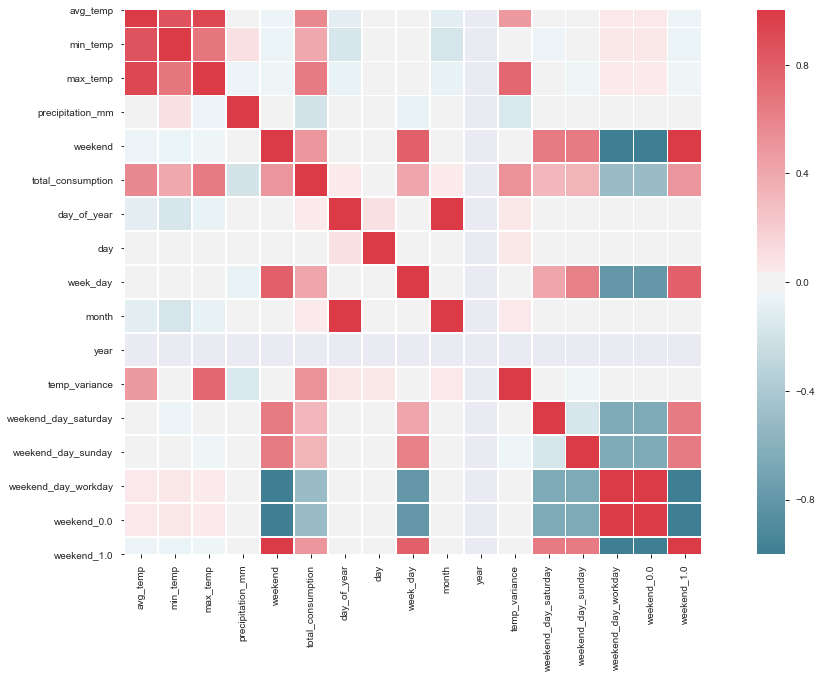

In [113]:
fig, ax = plt.subplots(figsize=(20,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, linewidths=.5)

## Train Test Split, hm....

In [114]:
beer_df.columns

Index(['avg_temp', 'min_temp', 'max_temp', 'precipitation_mm', 'weekend',
       'total_consumption', 'day_of_year', 'day', 'week_day', 'month', 'year',
       'temp_variance', 'weekend_day', 'weekend_day_saturday',
       'weekend_day_sunday', 'weekend_day_workday', 'weekend_0.0',
       'weekend_1.0'],
      dtype='object')

In [115]:
X = beer_df[beer_df.columns.difference(
    ['total_consumption','avg_temp', 'min_temp',
     'day_of_year', 'day', 'week_day', 'weekend',
     'weekend_day', 'weekend_day_saturday','weekend_day_sunday', 
     'weekend_day_workday', 'year'
    ])]

In [116]:
y = beer_df.total_consumption

In [117]:
X.head()

,max_temp,month,precipitation_mm,temp_variance,weekend_0.0,weekend_1.0
date,,,,,,
2015-01-01,32.5,1,0.0,8.6,1,0
2015-01-02,33.5,1,0.0,9.0,1,0
2015-01-03,29.9,1,0.0,7.5,0,1
2015-01-04,28.6,1,1.2,7.1,0,1
2015-01-05,28.3,1,0.0,7.3,1,0


In [118]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg.fit(X_train, y_train)
r2_score = reg.score(X_test, y_test)
print(f"{r2_score:.2f} variance explained.")

0.73 variance explained.


In [119]:
coefs = np.array(reg.coef_).tolist()
pd.DataFrame(list(zip(list(X.columns), coefs)), columns=['features', 'coefs'])

,features,coefs
0,max_temp,0.714675
1,month,0.186763
2,precipitation_mm,-0.054706
3,temp_variance,-0.066138
4,weekend_0.0,-2.738151
5,weekend_1.0,2.738151


## Pred vs True values

In [120]:
y_predict = reg.predict(X_test)

Text(0, 0.5, 'Predictions')

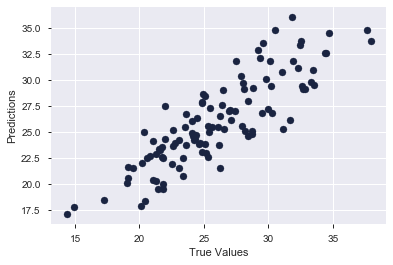

In [121]:
plt.scatter(y_test, y_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Scoring

In [122]:
from sklearn.metrics import mean_squared_error
import math

reg_mse = mean_squared_error(y_predict, y_test)

print(f"MSE: {reg_mse:.2f}")
print(f"RMSE: {math.sqrt(reg_mse):.2f}")

MSE: 5.95
RMSE: 2.44


## Cross-validation

In [123]:
scores = cross_val_score(reg, X, y, cv=6)

Text(0, 0.5, 'R2 score')

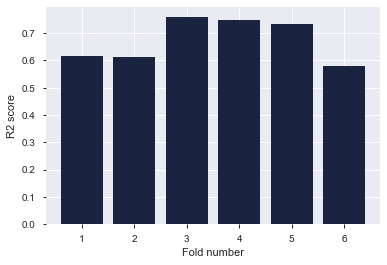

In [124]:
plt.bar(list(range(1, len(scores)+1)), scores)
plt.xlabel("Fold number")
plt.ylabel("R2 score")

In [125]:
print(f"Mean 6-Fold R Squared: {np.mean(scores):.2f}")

Mean 6-Fold R Squared: 0.67


In [126]:
beer_df.columns

Index(['avg_temp', 'min_temp', 'max_temp', 'precipitation_mm', 'weekend',
       'total_consumption', 'day_of_year', 'day', 'week_day', 'month', 'year',
       'temp_variance', 'weekend_day', 'weekend_day_saturday',
       'weekend_day_sunday', 'weekend_day_workday', 'weekend_0.0',
       'weekend_1.0'],
      dtype='object')

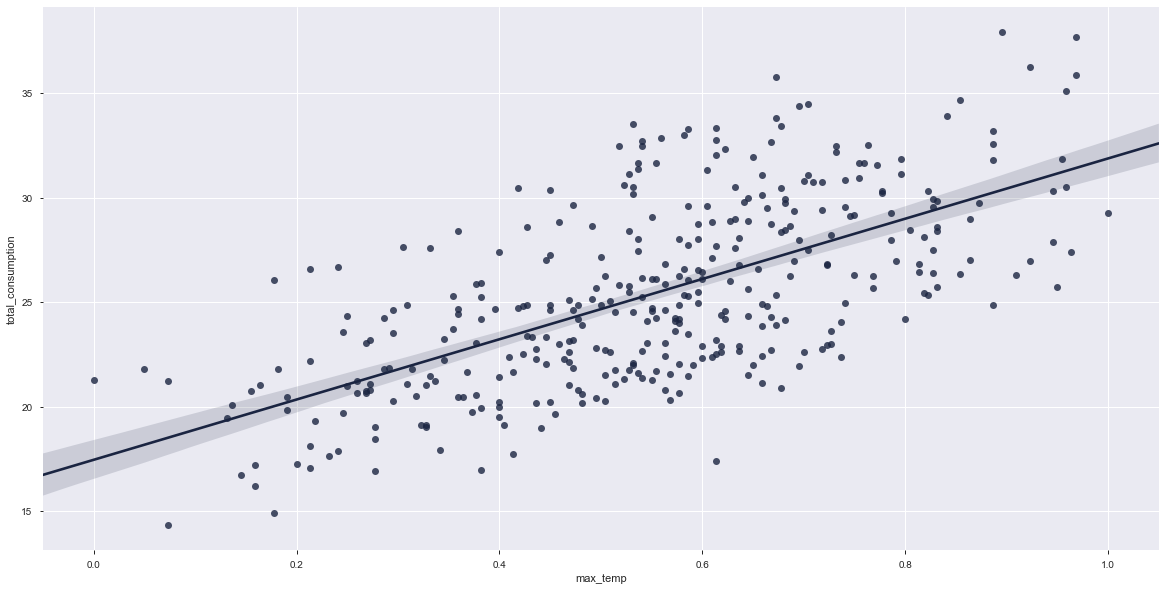

In [127]:
fig, (ax1) = plt.subplots(figsize=(20,10))
sns.regplot(lin_reg_df_min_max.max_temp, lin_reg_df_min_max.total_consumption, ax=ax1)

In [128]:
from sklearn.cluster import KMeans

data = np.array(list(zip(beer_df.total_consumption, beer_df.max_temp)))

Text(0, 0.5, 'WCSS')

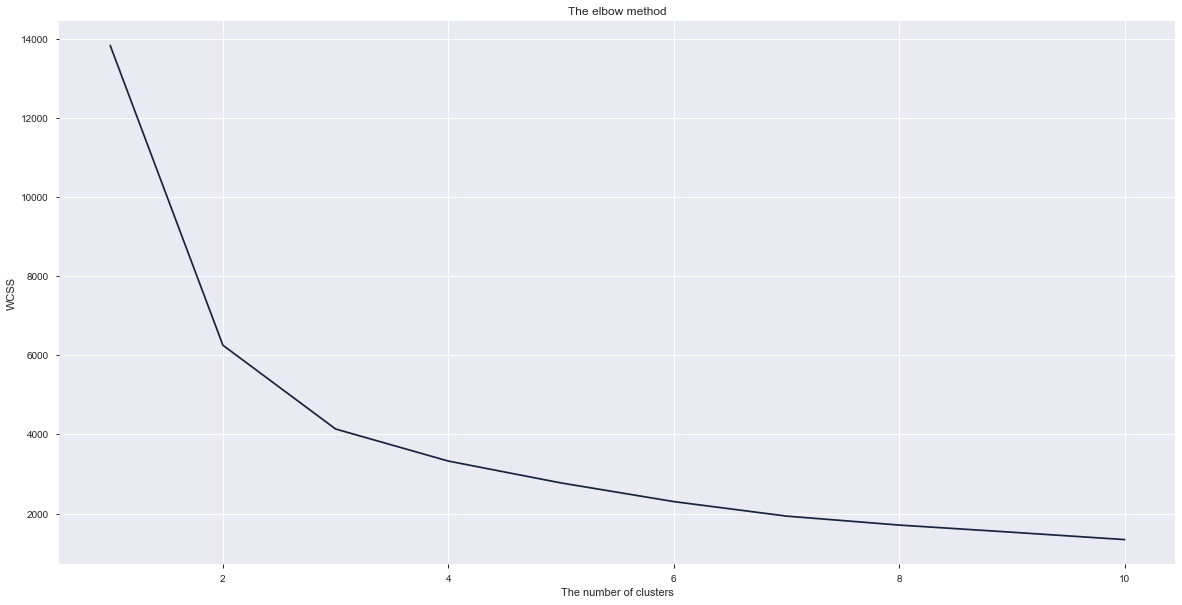

In [129]:
fig, axes = plt.subplots(figsize=(20,10))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')

In [130]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(data)
y_km = kmeans.fit_predict(data)

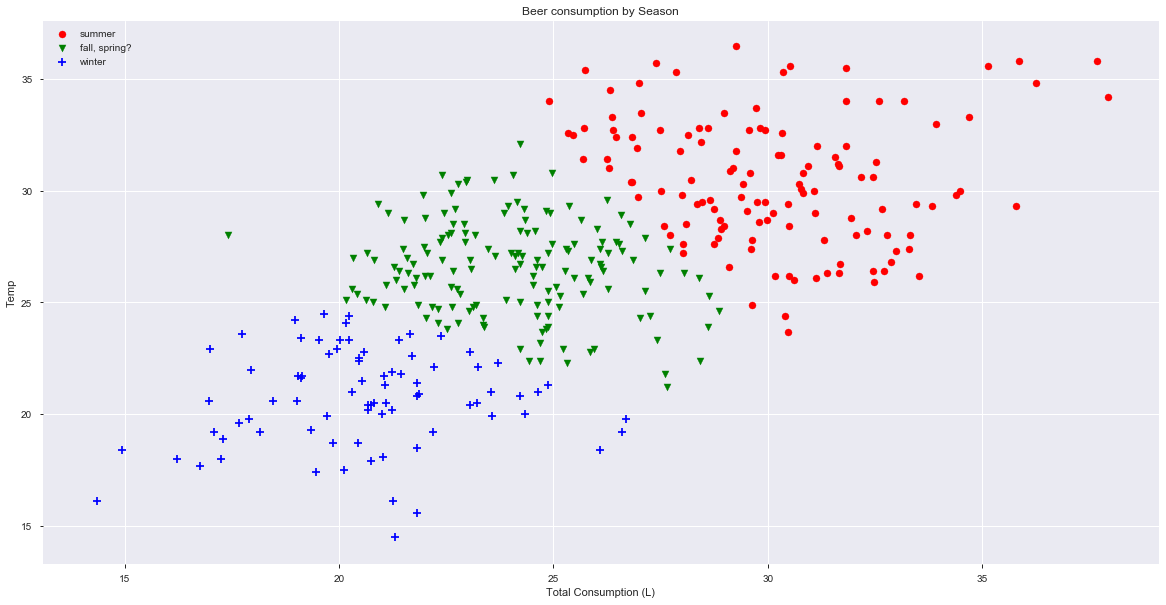

In [131]:
fig, axes = plt.subplots(figsize=(20,10))

plt.scatter(data[y_km ==0,0], data[y_km == 0,1], s=50, c='red', marker='o', label='summer')
plt.scatter(data[y_km ==1,0], data[y_km == 1,1], s=50, c='green', marker='v', label='fall, spring?')
plt.scatter(data[y_km ==2,0], data[y_km == 2,1], s=50, c='blue',  marker='+', label='winter')
# plt.scatter(data[y_km ==3,0], data[y_km == 3,1], s=50, c='red',  marker='o', label='summer')

plt.title('Beer consumption by Season')
plt.xlabel('Total Consumption (L)')
plt.ylabel('Temp')
plt.legend()

In [132]:
s = sum(data[y_km==1,0])
f = sum(data[y_km==1,0])
w = sum(data[y_km==2,0])

print(f"{s:.2f}L in the summer, {f:.2f}L in the 'fall, spring?', {w:.2f}L in the winter.")

3796.47L in the summer, 3796.47L in the 'fall, spring?', 1647.74L in the winter.
